In [66]:
import pandas as pd
#import pandas_profiling
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import warnings
# evitar warnings
warnings.filterwarnings('ignore')

# imprimir todas las columnas de un dataframe
pd.options.display.max_columns=None

# Cargar datos

In [67]:
#df = pd.read_csv("consulta1.csv")
df = pd.read_csv("df_total_genres.csv")

# Funciones

In [68]:
def missing_values_table(df):
    '''
    Se pasa como parametro un df de pandas, devuelve la 
    cantidad de valores NaN y a que porcentaje del total de valores corresponen
    
    '''
    
    mis_val = df.isna().sum()
    mis_val_percent = 100 * df.isna().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [16]:
print(df.shape)
df.head(2)

(2843, 43)


user_id  items_count      steam_id  item_id  \
0  76561197970982479        277.0  7.656120e+16     10.0   
1            js41637        888.0  7.656120e+16     20.0   

               item_name  playtime_forever publisher      genres  \
0         Counter-Strike               6.0     Valve  ['Action']   
1  Team Fortress Classic               0.0     Valve  ['Action']   

                app_name                  title release_date  \
0         Counter-Strike         Counter-Strike   2000-11-01   
1  Team Fortress Classic  Team Fortress Classic   1999-04-01   

                                                tags  \
0  ['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...   
1  ['Action', 'FPS', 'Multiplayer', 'Classic', 'S...   

                                         reviews_url  \
0  http://steamcommunity.com/app/10/reviews/?brow...   
1  http://steamcommunity.com/app/20/reviews/?brow...   

                                          specs  price  early_access  \
0  ['Multi-player', 'Valve Anti-Cheat enabled']   9.99         False   
1  ['Multi-player', 'Valve Anti-Cheat enabled']   4.99         False   

  developer                                    user_url_y  \
0     Valve  http://steamcommunity.com/id/sunnnnnnnnnnnny   
1     Valve       http://steamcommunity.com/id/GetMLGRekt   

                              funny                  posted  recommend  \
0                               NaN  Posted August 1, 2015.       True   
1  1 person found this review funny   Posted June 20, 2014.      False   

   sentiment_analysis  release_year  Action  Adventure  \
0                   2          2000       1          0   
1                   0          1999       1          0   

   Animation &amp; Modeling  Audio Production  Casual  \
0                         0                 0       0   
1                         0                 0       0   

   Design &amp; Illustration  Early Access  Education  Free to Play  Indie  \
0                          0             0          0             0      0   
1                          0             0          0             0      0   

   Massively Multiplayer  RPG  Racing  Simulation  Software Training  Sports  \
0                      0    0       0           0                  0       0   
1                      0    0       0           0                  0       0   

   Strategy  Utilities  Video Production  Web Publishing  
0         0          0                 0               0  
1         0          0                 0               0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    2843 non-null   object 
 1   items_count                2458 non-null   float64
 2   steam_id                   2458 non-null   float64
 3   item_id                    2843 non-null   float64
 4   item_name                  2843 non-null   object 
 5   playtime_forever           2843 non-null   float64
 6   publisher                  2843 non-null   object 
 7   genres                     2843 non-null   object 
 8   app_name                   2843 non-null   object 
 9   title                      2843 non-null   object 
 10  release_date               2843 non-null   object 
 11  tags                       2843 non-null   object 
 12  reviews_url                2843 non-null   object 
 13  specs                      2820 non-null   objec

In [69]:
df = df.drop('specs', axis=1)

In [70]:
columnas=['items_count','title','reviews_url','tags','early_access','user_url_y','posted','funny','genres']
df = df.drop(columnas, axis=1)
df.dropna(how='all',inplace=True)
df.reset_index(drop=True)
df.head(2)

user_id      steam_id  item_id              item_name  \
0  76561197970982479  7.656120e+16     10.0         Counter-Strike   
1            js41637  7.656120e+16     20.0  Team Fortress Classic   

   playtime_forever publisher               app_name release_date  price  \
0               6.0     Valve         Counter-Strike   2000-11-01   9.99   
1               0.0     Valve  Team Fortress Classic   1999-04-01   4.99   

  developer  recommend  sentiment_analysis  release_year  Action  Adventure  \
0     Valve       True                   2          2000       1          0   
1     Valve      False                   0          1999       1          0   

   Animation &amp; Modeling  Audio Production  Casual  \
0                         0                 0       0   
1                         0                 0       0   

   Design &amp; Illustration  Early Access  Education  Free to Play  Indie  \
0                          0             0          0             0      0   
1                          0             0          0             0      0   

   Massively Multiplayer  RPG  Racing  Simulation  Software Training  Sports  \
0                      0    0       0           0                  0       0   
1                      0    0       0           0                  0       0   

   Strategy  Utilities  Video Production  Web Publishing  
0         0          0                 0               0  
1         0          0                 0               0

# 1 Valores atipicos

PRICE

a) boxplot

Text(0.5, 1.0, 'Precio')

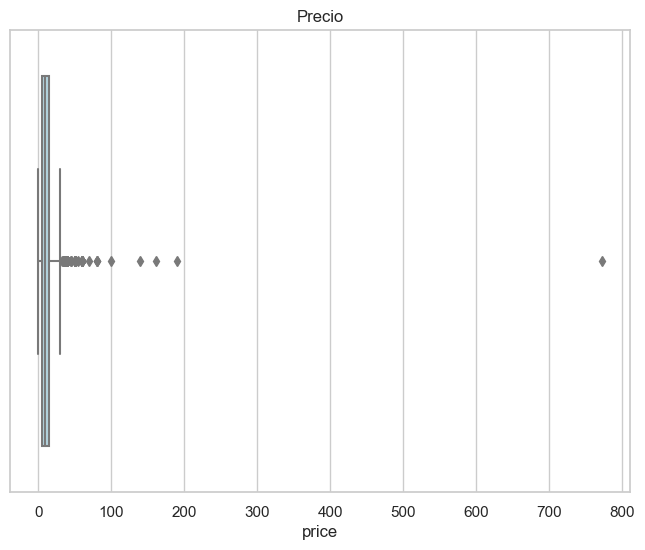

In [20]:
# Crea un boxplot de una columna específica en el DataFrame
sns.set(style="whitegrid")  # Establece el estilo del gráfico
plt.figure(figsize=(8, 6))  # Opcional: establece el tamaño del gráfico

sns.boxplot(data=df, x='price', color='lightblue')
plt.title("Precio")


b) Histograma

<Axes: xlabel='price', ylabel='Density'>

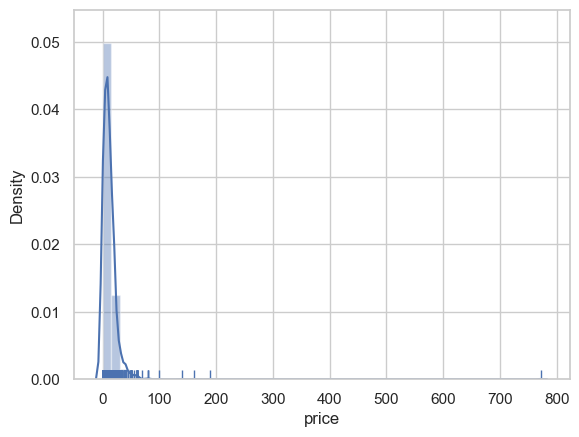

In [21]:
sns.distplot(df['price'], hist=True, kde=True, rug=True)

tanto el boxplot como el histograma me da que hay un valor atipico que debera arreglarse. Usaremos la regla de 3 sifma para solucionar el outlayer

SOLUCION ATIPICO PRICE(regla de 3 sigma)

In [71]:
# Calcular la media y la desviación estándar
media = df['price'].mean()
desviacion_std = df['price'].std()

# Definir límites basados en la regla de 3 sigma
limite_inferior = media - 3 * desviacion_std
limite_superior = media + 3 * desviacion_std

print('inferior',limite_inferior,'superior',limite_superior)

# Filtrar el DataFrame
df = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

inferior -43.19894762729564 superior 67.02672814083768


In [23]:
df.shape

(2834, 33)

In [25]:
df.describe(include=[np.number])

steam_id        item_id  playtime_forever        price  \
count  2.450000e+03    2834.000000       2834.000000  2834.000000   
mean   7.656120e+16  250788.495060        365.718419    11.361588   
std    3.992934e+07  131732.009957       1731.577387    10.041874   
min    7.656120e+16      10.000000          0.000000     0.000000   
25%    7.656120e+16  207660.000000          0.000000     4.990000   
50%    7.656120e+16  269340.000000         44.000000     9.990000   
75%    7.656120e+16  345602.500000        224.000000    14.990000   
max    7.656120e+16  527340.000000      45818.000000    59.990000   

       sentiment_analysis  release_year       Action    Adventure  \
count         2834.000000   2834.000000  2834.000000  2834.000000   
mean             1.462950   2012.520466     0.520819     0.323924   
std              0.775237      4.089767     0.499655     0.468054   
min              0.000000   1989.000000     0.000000     0.000000   
25%              1.000000   2012.000000     0.000000     0.000000   
50%              2.000000   2014.000000     1.000000     0.000000   
75%              2.000000   2015.000000     1.000000     1.000000   
max              2.000000   2017.000000     1.000000     1.000000   

       Animation &amp; Modeling  Audio Production       Casual  \
count               2834.000000       2834.000000  2834.000000   
mean                   0.002470          0.000706     0.187015   
std                    0.049647          0.026561     0.389992   
min                    0.000000          0.000000     0.000000   
25%                    0.000000          0.000000     0.000000   
50%                    0.000000          0.000000     0.000000   
75%                    0.000000          0.000000     0.000000   
max                    1.000000          1.000000     1.000000   

       Design &amp; Illustration  Early Access    Education  Free to Play  \
count                2834.000000   2834.000000  2834.000000   2834.000000   
mean                    0.002470      0.052223     0.001411      0.112562   
std                     0.049647      0.222516     0.037549      0.316112   
min                     0.000000      0.000000     0.000000      0.000000   
25%                     0.000000      0.000000     0.000000      0.000000   
50%                     0.000000      0.000000     0.000000      0.000000   
75%                     0.000000      0.000000     0.000000      0.000000   
max                     1.000000      1.000000     1.000000      1.000000   

             Indie  Massively Multiplayer          RPG       Racing  \
count  2834.000000            2834.000000  2834.000000  2834.000000   
mean      0.554693               0.050812     0.205363     0.040579   
std       0.497087               0.219652     0.404038     0.197347   
min       0.000000               0.000000     0.000000     0.000000   
25%       0.000000               0.000000     0.000000     0.000000   
50%       1.000000               0.000000     0.000000     0.000000   
75%       1.000000               0.000000     0.000000     0.000000   
max       1.000000               1.000000     1.000000     1.000000   

        Simulation  Software Training       Sports     Strategy    Utilities  \
count  2834.000000        2834.000000  2834.000000  2834.000000  2834.000000   
mean      0.164432           0.001764     0.034933     0.224771     0.005999   
std       0.370732           0.041974     0.183642     0.417505     0.077232   
min       0.000000           0.000000     0.000000     0.000000     0.000000   
25%       0.000000           0.000000     0.000000     0.000000     0.000000   
50%       0.000000           0.000000     0.000000     0.000000     0.000000   
75%       0.000000           0.000000     0.000000     0.000000     0.000000   
max       1.000000           1.000000     1.000000     1.000000     1.000000   

       Video Production  Web Publishing  
count       2834.000000     2834.000000  
mean           0.002470        0.

# SISTEMA DE PREDICCION

In [26]:
# Caraterísticas de las variables numéricas categóricas
df.describe(include=object)

user_id       item_name publisher        app_name release_date  \
count        2834            2834      2834            2834         2834   
unique       2448            2834      1491            2834         1574   
top     sinuserid  Counter-Strike   Ubisoft  Counter-Strike   2014-06-06   
freq          384               1        66               1            9   

       developer  
count       2834  
unique      2051  
top       sindev  
freq          46

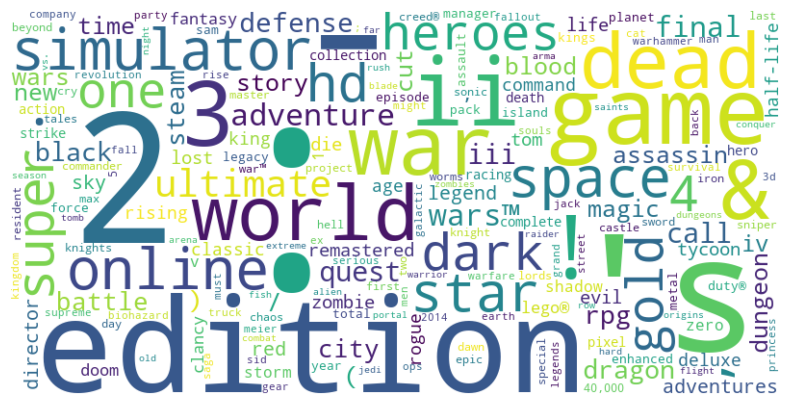

In [27]:
import nltk#
from wordcloud import WordCloud #
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#### GENERAMOS UNA NUBE DE LAS PALABRAS MAS FRECUENTES EN LA COLUMNA 'title'

def generate_wordcloud(texts):
    # Get English prepositions
    stop_words = set(stopwords.words('english'))

    # Combine all the texts into a single string
    combined_text = ' '.join(str(text) for text in texts)

    # Tokenize the combined text into words
    words = word_tokenize(combined_text)

    # Filter out the prepositions
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

    # Create a frequency distribution of the words
    freq_dist = nltk.FreqDist(filtered_words)

    # Create the word cloud with word frequencies as input
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine all the text from the 'title' column into a single list
all_text = df['app_name'].tolist()

# Apply the function to the combined text
generate_wordcloud(all_text)

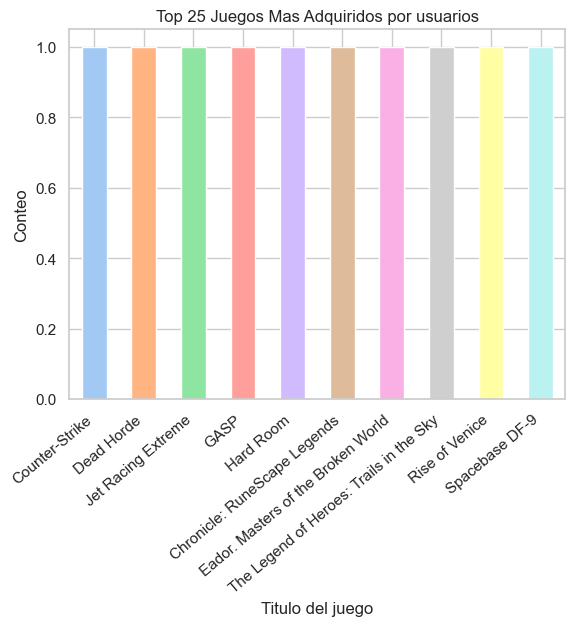

In [28]:
colors = sns.color_palette('pastel')
ax = df["app_name"].value_counts()\
    .head(10)\
    .plot(kind='bar', title = 'Top 25 Juegos Mas Adquiridos por usuarios', color=colors)
ax.set_xlabel('Titulo del juego')
ax.set_ylabel('Conteo')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.show()

In [72]:
# Cuenta los valores duplicados en la columna "columna1"
conteo_duplicados = df['app_name'].value_counts()
conteo_duplicados

app_name
Counter-Strike                       1
Dead Horde                           1
Jet Racing Extreme                   1
GASP                                 1
Hard Room                            1
                                    ..
Oddworld: Stranger's Wrath HD        1
Tom Clancy's Rainbow Six® Vegas 2    1
Prince of Persia: Warrior Within™    1
From Dust                            1
My Paper Boat                        1
Name: count, Length: 2834, dtype: int64

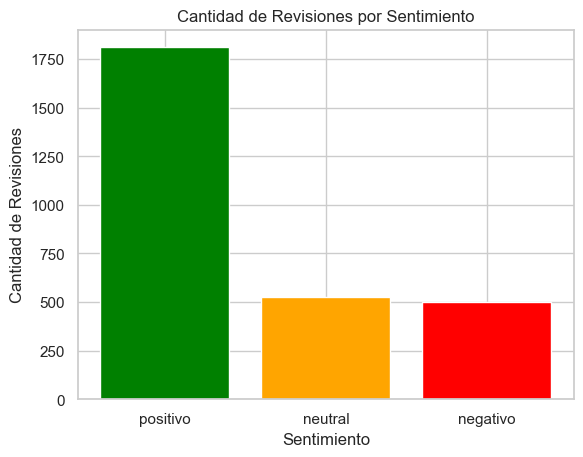

In [30]:
colors = ['green', 'orange', 'red']
df_rev_sentimiento = df.copy()
df_rev_sentimiento['sentiment_analysis'] = df_rev_sentimiento['sentiment_analysis'].map({0: 'negativo', 1: 'neutral', 2: 'positivo'})
sentimiento_counts = df_rev_sentimiento['sentiment_analysis'].value_counts()
plt.bar(sentimiento_counts.index, sentimiento_counts.values, color=colors)
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Revisiones')
plt.title('Cantidad de Revisiones por Sentimiento')
plt.show()

# 2° Seleccion y reduccion de dimencionalidad

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2834 entries, 0 to 2842
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    2834 non-null   object 
 1   steam_id                   2450 non-null   float64
 2   item_id                    2834 non-null   float64
 3   item_name                  2834 non-null   object 
 4   playtime_forever           2834 non-null   float64
 5   publisher                  2834 non-null   object 
 6   app_name                   2834 non-null   object 
 7   release_date               2834 non-null   object 
 8   price                      2834 non-null   float64
 9   developer                  2834 non-null   object 
 10  recommend                  2834 non-null   bool   
 11  sentiment_analysis         2834 non-null   int64  
 12  release_year               2834 non-null   int64  
 13  Action                     2834 non-null   int64  
 1

a) Reduccion por el tipo de informacion que aporta

b) Reduccion por el ratio de valores perdidos

In [73]:
def filtrar_columnas_nulas(df):
    umbral_proporcion = 0.02
    num_filas = len(df)
    columnas_filtradas = []

    for columna in df.columns:
        if df[columna].isnull().sum() == 0:  # Las columnas que no tienen nulos se mantienen
            continue
        else:
            num_nulos = df[columna].isnull().sum()  # Se cuenta el número de nulos en la columna
            proporcion_nulos = num_nulos / num_filas

            if proporcion_nulos > umbral_proporcion:
                columnas_filtradas.append(columna)

    df.drop(columns=columnas_filtradas, inplace=True)  # Eliminar las columnas del dataframe

    print('Se filtraron las siguientes columnas:', columnas_filtradas)

    return df  # Retorna el dataframe actualizado

In [74]:
df = filtrar_columnas_nulas(df)

Se filtraron las siguientes columnas: ['steam_id']


c) Reduccion por alta correlacion (Vertical)

In [75]:
columnas=['user_id', 'item_id', 'item_name', 'playtime_forever', 'publisher',
       'app_name', 'release_date', 'price', 'developer', 'recommend',
       'sentiment_analysis', 'release_year']

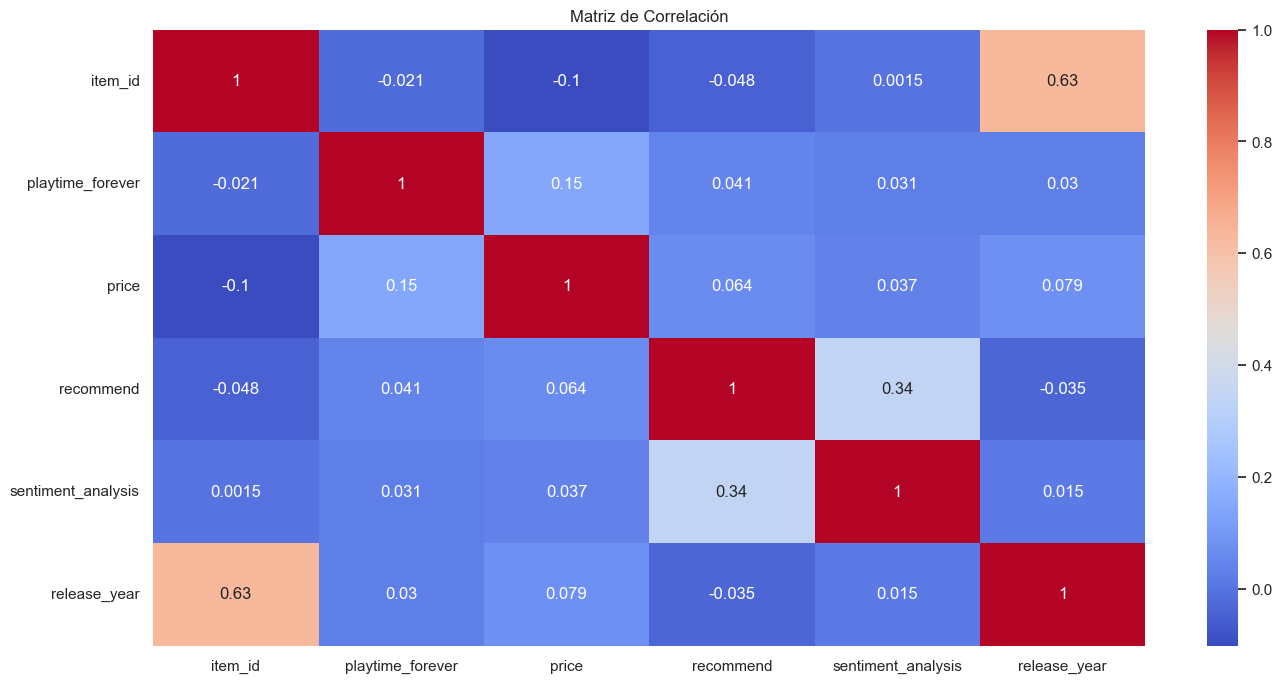

In [37]:
#df = df.drop('id', axis = 1)
data_num= df[columnas].select_dtypes(exclude = ['object'])
data_num.head(2)

correlation_matrix = data_num.corr()

plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

ninguno tiene relacion directa o indirectamente, entonces no elimino nada

d) Repetidos (Reduccion horizontal)

In [76]:
# Contar la frecuencia de cada película en la columna 'app_name'
peliculas_repetidas = df['app_name'].value_counts()

# Filtrar las películas que se repiten
peliculas_repetidas = peliculas_repetidas[peliculas_repetidas > 1]

# Obtener el número de películas repetidas
num_peliculas_repetidas = len(peliculas_repetidas)

print("Número de películas que se repiten:", num_peliculas_repetidas)

Número de películas que se repiten: 0


In [77]:
# Cuenta los valores duplicados en la columna "columna1"
conteo_duplicados = df['user_id'].value_counts()
conteo_duplicados

user_id
sinuserid            384
76561198088224663      2
camo88                 2
MrPolicimo             2
76561198062440911      1
                    ... 
Hamz12                 1
hand0fcthulhu          1
Noster69               1
supersushi987          1
76561198100807328      1
Name: count, Length: 2448, dtype: int64

e) Reduccion por baja varianza

In [40]:
df_finality=df.copy()

In [78]:
# Calcular la varianza de las columnas numéricas
numeric_columns = df_finality.select_dtypes(include=[float, int]).columns
variances = df_finality[numeric_columns].var()

# Establecer un umbral para la varianza (puedes ajustar este valor según tus necesidades)
umbral_varianza = 1e-3

# Filtrar las columnas con baja varianza
columnas_baja_varianza = variances[variances <= umbral_varianza].index

# Crear un nuevo DataFrame con las columnas de baja varianza
df_finality_baja_varianza = df_finality[columnas_baja_varianza]

print(df_finality_baja_varianza)

      Audio Production
0                    0
1                    0
2                    0
3                    0
4                    0
...                ...
2838                 0
2839                 0
2840                 0
2841                 0
2842                 0

[2834 rows x 1 columns]


In [42]:
df_finality.shape

(2834, 32)

f) Reduccion por PCA

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_columns = df_finality.select_dtypes(include=[float, int]).columns
df_numeric = df_finality[numeric_columns]

# Estandarizar los datos (importante para PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Aplicar PCA
n_components = 2  # Número de componentes principales deseados
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data_scaled)

# Crear un nuevo DataFrame con los componentes principales
columns_pca = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=pca_result, columns=columns_pca)

print(df_pca)

           PC1       PC2
0     0.068170 -3.397677
1    -0.032224 -3.420961
2     0.037229 -2.929268
3     0.040261 -3.163298
4     0.005532 -3.409195
...        ...       ...
2829 -0.412312  1.984862
2830 -0.216494  0.882753
2831  0.166535 -0.070755
2832 -0.115261  1.084111
2833 -0.116850  0.725609

[2834 rows x 2 columns]


# SISTEMA DE PREDICCION

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2834 entries, 0 to 2842
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    2834 non-null   object 
 1   item_id                    2834 non-null   float64
 2   item_name                  2834 non-null   object 
 3   playtime_forever           2834 non-null   float64
 4   publisher                  2834 non-null   object 
 5   app_name                   2834 non-null   object 
 6   release_date               2834 non-null   object 
 7   price                      2834 non-null   float64
 8   developer                  2834 non-null   object 
 9   recommend                  2834 non-null   bool   
 10  sentiment_analysis         2834 non-null   int64  
 11  release_year               2834 non-null   int64  
 12  Action                     2834 non-null   int64  
 13  Adventure                  2834 non-null   int64  
 1

In [82]:
['item_id', 'playtime_forever', 
         'price', 'developer', 'recommend',
       'sentiment_analysis', 'release_year', 'Action', 'Adventure',
       'Animation &amp; Modeling', 'Audio Production', 'Casual',
       'Design &amp; Illustration', 'Early Access', 'Education',
       'Free to Play', 'Indie', 'Massively Multiplayer', 'RPG', 'Racing',
       'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing']

['user_id',
 'item_id',
 'item_name',
 'playtime_forever',
 'publisher',
 'app_name',
 'release_date',
 'price',
 'developer',
 'recommend',
 'sentiment_analysis',
 'release_year',
 'Action',
 'Adventure',
 'Animation &amp; Modeling',
 'Audio Production',
 'Casual',
 'Design &amp; Illustration',
 'Early Access',
 'Education',
 'Free to Play',
 'Indie',
 'Massively Multiplayer',
 'RPG',
 'Racing',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Utilities',
 'Video Production',
 'Web Publishing']

In [86]:
df[['price', 'playtime_forever','sentiment_analysis','app_name','user_id']]

price  playtime_forever  sentiment_analysis                   app_name  \
0      9.99               6.0                   2             Counter-Strike   
1      4.99               0.0                   0      Team Fortress Classic   
2      4.99               7.0                   2              Day of Defeat   
3      4.99               0.0                   2         Deathmatch Classic   
4      4.99               0.0                   1  Half-Life: Opposing Force   
...     ...               ...                 ...                        ...   
2838  14.99               0.0                   1                    Shrooms   
2839   8.99              21.0                   2              Transcendence   
2840  34.99             151.0                   2          Fernbus Simulator   
2841  11.99             104.0                   2            Vernon's Legacy   
2842   4.99              48.0                   2              My Paper Boat   

                user_id  
0     76561197970982479  
1               js41637  
2             evcentric  
3            Riot-Punch  
4                 doctr  
...                 ...  
2838          sinuserid  
2839          sinuserid  
2840          sinuserid  
2841          sinuserid  
2842          sinuserid  

[2834 rows x 5 columns]

In [90]:
# Crear una matriz de características donde las filas son los juegos y las columnas son las características relevantes
matriz_caracteristicas = df.pivot(index='app_name', columns='user_id', values=['price', 'playtime_forever']).fillna(0)
matriz_caracteristicas

price                 \
user_id                                      -AnimeIsMyThing- -Azsael- 0-3-0   
app_name                                                                       
! That Bastard Is Trying To Steal Our Gold !              0.0      0.0   0.0   
//N.P.P.D. RUSH//- The milk of Ultraviolet                0.0      0.0   0.0   
0.00                                                      0.0      0.0   0.0   
0RBITALIS                                                 0.0      0.0   0.0   
10,000,000                                                0.0      0.0   0.0   
...                                                       ...      ...   ...   
sZone-Online                                              0.0      0.0   0.0   
the static speaks my name                                 0.0      0.0   0.0   
theHunter Classic                                         0.0      0.0   0.0   
theHunter: Primal                                         0.0      0.0   0.0   
Астролорды: Облако Оорта                                  0.0      0.0   0.0   

                                                                           \
user_id                                      04061993 0432-026-no 0814551   
app_name                                                                    
! That Bastard Is Trying To Steal Our Gold !      0.0         0.0     0.0   
//N.P.P.D. RUSH//- The milk of Ultraviolet        0.0         0.0     0.0   
0.00                                              0.0         0.0     0.0   
0RBITALIS                                         0.0         0.0     0.0   
10,000,000                                        0.0         0.0     0.0   
...                                               ...         ...     ...   
sZone-Online                                      0.0         0.0     0.0   
the static speaks my name                         0.0         0.0     0.0   
theHunter Classic                                 0.0         0.0     0.0   
theHunter: Primal                                 0.0         0.0     0.0   
Астролорды: Облако Оорта                          0.0         0.0     0.0   

                                                                        \
user_id                                      1001101001110101 10051997   
app_name                                                                 
! That Bastard Is Trying To Steal Our Gold !              0.0      0.0   
//N.P.P.D. RUSH//- The milk of Ultraviolet                0.0      0.0   
0.00                                                      0.0      0.0   
0RBITALIS                                                 0.0      0.0   
10,000,000                                                0.0      0.0   
...                                                       ...      ...   
sZone-Online                                              0.0      0.0   
the static speaks my name                                 0.0      0.0   
theHunter Classic                                         0.0      0.0   
theHunter: Primal                                         0.0      0.0   
Астролорды: Облако Оорта                                  0.0      0.0   

                                                                           \
user_id                                      1136579070 122799 1234865654   
app_name                                                                    
! That Bastard Is Trying To Steal Our Gold !        0.0    0.0        0.0   
//N.P.P.D. RUSH//- The milk of Ultraviolet          0.0    0.0        0.0   
0.00                                                0.0    0.0        0.0   
0RBITALIS                                           0.0    0.0        0.0   
10,000,000                                          0.0    0.0        0.0   
...                                                 ...    ...        ...   
sZone-Online                                        0.0    0.0        0.0   
the static speaks my name                        

In [91]:
# Calcular la similitud de coseno entre el user_id y los juegos en función de las características relevantes
similitud = cosine_similarity(matriz_caracteristicas)
similitud

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2834 entries, 0 to 2842
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    2834 non-null   object 
 1   item_id                    2834 non-null   float64
 2   item_name                  2834 non-null   object 
 3   playtime_forever           2834 non-null   float64
 4   publisher                  2834 non-null   object 
 5   app_name                   2834 non-null   object 
 6   release_date               2834 non-null   object 
 7   price                      2834 non-null   float64
 8   developer                  2834 non-null   object 
 9   recommend                  2834 non-null   bool   
 10  sentiment_analysis         2834 non-null   int64  
 11  release_year               2834 non-null   int64  
 12  Action                     2834 non-null   int64  
 13  Adventure                  2834 non-null   int64  
 1

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import joblib

# Crear un DataFrame de ejemplo
data = {'AP Name': ['AP1', 'AP2', 'AP3', 'AP4'],
        'price': [10, 20, 15, 30],
        'Notificacion':['bueno','malo','regular','bueno'],
        'developer': ['santi', 'paco', 'santi', 'ale']}

#df = pd.DataFrame(data)

# Datos de ejemplo para los nombres de los AP
#nombres_ap = ['Cafetería Starbucks', 'Sala de reuniones A', 'Cafetería Dunkin', 'Sala de reuniones B']

# Agregar los nombres de los AP al DataFrame
#df['Nombre AP'] = nombres_ap

# Combinar prices numéricas y el desarrollador en una sola columna
df['prices'] = df['price'].astype(str) + ' ' + df['developer'] +' '+df['sentiment_analysis'].astype(str)

# Crear un vectorizador TF-IDF para las prices
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Calcular la matriz TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['prices'])

# Calcular la similitud de coseno entre las prices
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

joblib.dump(cosine_sim,'modelo_entrenado.pkl')
# Función para obtener recomendaciones basadas en prices y desarrollador
def obtener_recomendaciones(user_id, cosine_sim=cosine_sim):
    idx = df[df['user_id'] == user_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:4]  # Obtener las 3 recomendaciones principales
    ap_indices = [i[0] for i in sim_scores]
    #return df['app_name'].iloc[ap_indices]

    lista_top= df['app_name'].iloc[ap_indices].tolist()

    respuesta = {user_id:[
        {'Top 3 Lista recomendado': lista_top}]
        }

    return respuesta

# Ejemplo de recomendación para un AP específico
recomendaciones = obtener_recomendaciones('evcentric')
print("Recomendaciones para AP1:")
print(recomendaciones)


Recomendaciones para AP1:
{'evcentric': [{'Top 3 Lista recomendado': 1    Team Fortress Classic
2            Day of Defeat
3       Deathmatch Classic
Name: app_name, dtype: object}]}


In [116]:
df['app_name'].iloc[[1,2,3,4]]

1    Team Fortress Classic
2            Day of Defeat
Name: app_name, dtype: object

In [108]:
missing_values_table(df)

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

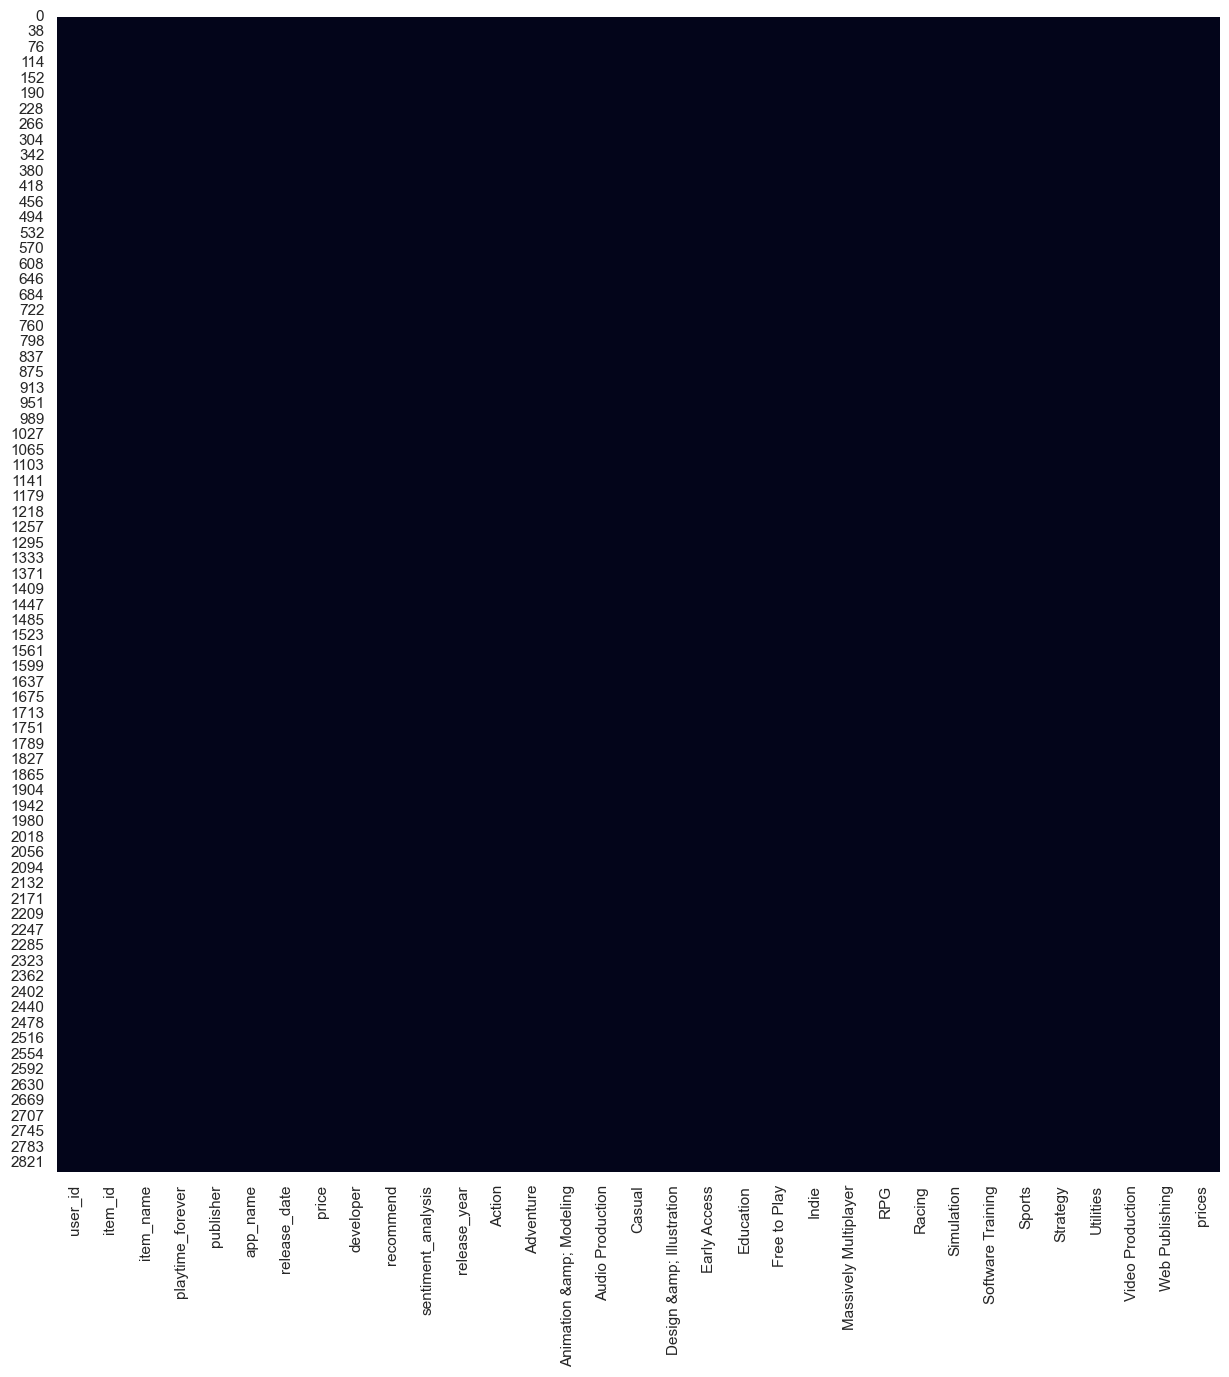

In [109]:
# Reemplazar todos los valores NaN por nan
df_total = df.fillna(np.nan)
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_total.isnull(), cbar=False)
plt.show()

## Elimino columnas que no tienen relevancia

items_count      steam_id        item_id  playtime_forever  \
count  2458.000000  2.458000e+03    2843.000000       2843.000000   
mean     90.631814  7.656120e+16  250892.432290        368.682026   
std     230.571151  3.988098e+07  131565.793814       1734.382236   
min       0.000000  7.656120e+16      10.000000          0.000000   
25%      19.000000  7.656120e+16  207740.000000          0.000000   
50%      54.500000  7.656120e+16  269350.000000         44.000000   
75%     107.000000  7.656120e+16  345510.000000        224.500000   
max    7762.000000  7.656120e+16  527340.000000      45818.000000   

             price  sentiment_analysis  release_year  
count  2843.000000         2843.000000   2843.000000  
mean     11.913890            1.462891   2012.524094  
std      18.370946            0.775422      4.084139  
min       0.000000            0.000000   1989.000000  
25%       4.990000            1.000000   2012.000000  
50%       9.990000            2.000000   2014.000000  
75%      14.990000            2.000000   2015.000000  
max     771.710000            2.000000   2017.000000